In [854]:
import numpy as np
import pandas as pd
import seaborn as sb

from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

from pandas.plotting import lag_plot
from matplotlib import pyplot

from statsmodels.tsa.stattools import adfuller
from numpy import log

from statsmodels.tsa.ar_model import AutoReg
from math import sqrt

from statsmodels.tsa.arima.model import ARIMA

In [855]:
dT_data1_hierarchical_pivoted = pd.read_csv('dT_data1_hierarchical_pivoted.csv')
dT_data1_hierarchical_pivoted

,SUBZONE_N,PLN_AREA_N,REGION_C,region_pln,region_pln_subzone,Male Percentage,00 - 19,20 - 39,40 - 59,60 & Over,Average Income,Year
0,ANG MO KIO TOWN CENTRE,ANG MO KIO,NER,NER_ANG MO KIO,NER_ANG MO KIO_ANG MO KIO TOWN CENTRE,0.469854,1010,1170,1560,1080,14031.765690,2020-12-31
1,ANG MO KIO TOWN CENTRE,ANG MO KIO,NER,NER_ANG MO KIO,NER_ANG MO KIO_ANG MO KIO TOWN CENTRE,0.466805,1030,1160,1590,1030,13907.732218,2019-12-31
2,ANG MO KIO TOWN CENTRE,ANG MO KIO,NER,NER_ANG MO KIO,NER_ANG MO KIO_ANG MO KIO TOWN CENTRE,0.468880,1050,1170,1560,1080,13743.987448,2018-12-31
3,ANG MO KIO TOWN CENTRE,ANG MO KIO,NER,NER_ANG MO KIO,NER_ANG MO KIO_ANG MO KIO TOWN CENTRE,0.471660,1090,1170,1560,1080,13602.922449,2017-12-31
4,ANG MO KIO TOWN CENTRE,ANG MO KIO,NER,NER_ANG MO KIO,NER_ANG MO KIO_ANG MO KIO TOWN CENTRE,0.471888,1120,1170,1560,1080,13539.979798,2016-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...
3195,YISHUN WEST,YISHUN,NR,NR_YISHUN,NR_YISHUN_YISHUN WEST,0.497408,11310,10300,9840,7560,7975.623628,2015-12-31
3196,YISHUN WEST,YISHUN,NR,NR_YISHUN,NR_YISHUN_YISHUN WEST,0.497263,11690,10300,9840,7560,7718.863448,2014-12-31
3197,YISHUN WEST,YISHUN,NR,NR_YISHUN,NR_YISHUN_YISHUN WEST,0.498234,12270,10300,9840,7560,7726.745677,2013-12-31
3198,YISHUN WEST,YISHUN,NR,NR_YISHUN,NR_YISHUN_YISHUN WEST,0.499080,12670,10300,9840,7560,7745.710815,2012-12-31


### Test train split

In time series machine learning analysis, our observations are not independent, and thus we cannot split the data randomly as we do in non-time-series analysis. Instead, we usually split observations along with the sequences.

In [680]:
X_total_grouped = pd.read_csv('total_Singapore.csv')
X_total_grouped = X_total_grouped.iloc[::-1]
X_total_grouped["Year"] = pd.to_datetime(X_total_grouped["Year"])
X_total_grouped.set_index('Year', inplace=True)
X_total_grouped

,Male Percentage,00 - 19,20 - 39,40 - 59,60 & Over,Average Income
Year,,,,,,
2011-12-31,0.493018,897650,1131400,1199410,1199410,10702
2012-12-31,0.492390,885170,1128460,1211950,1211950,10718
2013-12-31,0.491970,870310,1124880,1222980,1222980,10742
2014-12-31,0.491485,855300,1123900,1228440,1228440,10774
2015-12-31,0.491105,845320,1126850,1230320,1230320,10819
2016-12-31,0.490530,835940,1128380,1229820,1229820,10890
2017-12-31,0.490078,827450,1129570,1229430,1229430,10985
2018-12-31,0.489659,817650,1132270,1224840,1224840,11071
2019-12-31,0.489140,813290,1131540,1220880,1220880,11130


In [681]:
X_train_grouped = X_total_grouped[:-2]
X_train_grouped
#X_train grouped contains aggregated data from 2011-2019.

,Male Percentage,00 - 19,20 - 39,40 - 59,60 & Over,Average Income
Year,,,,,,
2011-12-31,0.493018,897650,1131400,1199410,1199410,10702
2012-12-31,0.492390,885170,1128460,1211950,1211950,10718
2013-12-31,0.491970,870310,1124880,1222980,1222980,10742
2014-12-31,0.491485,855300,1123900,1228440,1228440,10774
2015-12-31,0.491105,845320,1126850,1230320,1230320,10819
2016-12-31,0.490530,835940,1128380,1229820,1229820,10890
2017-12-31,0.490078,827450,1129570,1229430,1229430,10985
2018-12-31,0.489659,817650,1132270,1224840,1224840,11071


In [682]:
X_train_grouped = X_total_grouped[:-2]
X_train_grouped

,Male Percentage,00 - 19,20 - 39,40 - 59,60 & Over,Average Income
Year,,,,,,
2019-12-31,0.489140,813290,1131540,1220880,1220880,11130
2020-12-31,0.488985,803440,1128860,1212930,1212930,11175


## EXPLORING THE DATA – "00 - 19"

### Check for autocorrelation, randomness, seasonality (Lag plot)

A lag plot is a special type of scatter plot with the two variables (X,Y) “lagged.”

A “lag” is a fixed amount of passing time; One set of observations in a time series is plotted (lagged) against a second, later set of data. 

Lag plots allow you to check for: model suitability, outliers (data points with extremely high or low values), randomness (data without a pattern), serial correlation (where error terms in a time series transfer from one period to another), seasonality (periodic fluctuations in time series data that happens at regular periods).

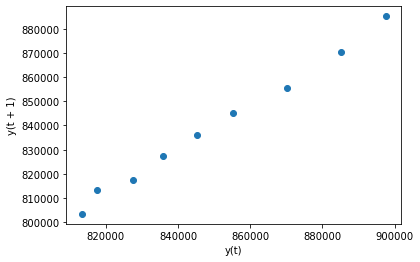

          t-1       t+1
t-1  1.000000  0.997041
t+1  0.997041  1.000000


In [683]:
lag_plot(X_total_grouped["00 - 19"])
pyplot.show()

values = DataFrame(X_total_grouped['00 - 19'].values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

From the lag plot, we can tell that autocorrelation is present for 00 - 19.

### Checking for stationarity (Time series plots, Augmented Dickey-Fuller test)

A stationary series is one in which the properties – mean, variance and covariance, do not vary with time. Stationarity is important in forecasting as most time series models assume that each point is independent of one another. 
We will do both a visual and statistical test for stationarity.

Note we cannot do rolling mean and sd due to a lack of data points.

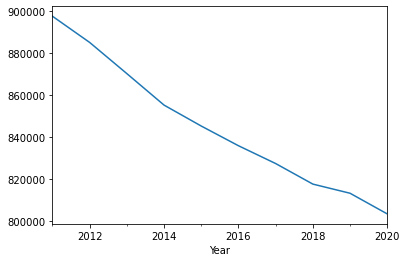

In [684]:
X_total_grouped["00 - 19"].plot()
pyplot.show()

The graph (visual test) shows that the time series does not exhibit stationarity.

ADF Statistic: -9.069427
p-value: 0.000000
Critical Values:
	1%: -5.354
	5%: -3.646
	10%: -2.901


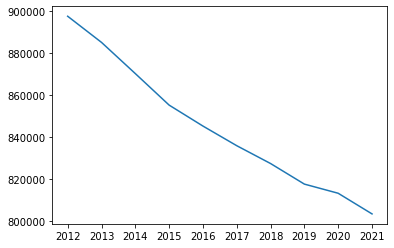

In [685]:
def ADFtest(data):
    plt.plot(data)
    series = data
    X = series.values
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
ADFtest(X_total_grouped['00 - 19'])

However, the Dickey-Fuller test (statistical) gives us a test statistic of -9, which is less than the value of -5.354 at 1%. Hence we reject the null hypothesis and conclude that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

Note that the graph is re-printed as we are re-factoring the ADF code into a function for future reusuability in testing our differencing (see below)

### Applying differencing regardless (to see if it will improve predictions)

Even though the statistical test tells us the time series has stationarity, but the visual test indicates otherwise. 
The statistical test may have returned negative due to insufficient data. Hence, we will apply a log transform to make the time series exhibit stationarity, and compare the R2 values.

ADF Statistic: -11.425412
p-value: 0.000000
Critical Values:
	1%: -5.354
	5%: -3.646
	10%: -2.901


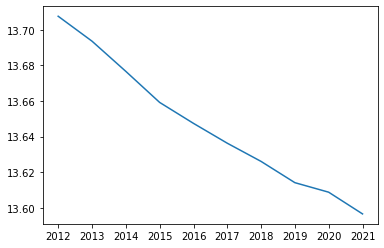

In [686]:
# log transform
data = X_total_grouped
data["00 - 19 - log"] = np.log(data["00 - 19"])
ADFtest(data["00 - 19 - log"])

Log transforming has given us a better ADF statistic. We will hence add it to the dataframe for R2 testing later

ADF Statistic: -0.863617
p-value: 0.799718
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844


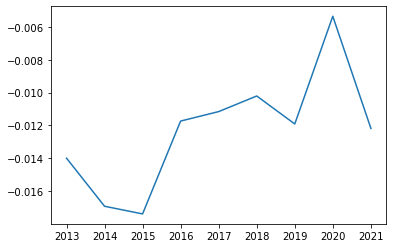

In [687]:
# log transform and subtract the previous value when time shifting
df_log_shift = data["00 - 19 - log"] - data["00 - 19 - log"].shift()
df_log_shift.dropna(inplace=True)
ADFtest(df_log_shift)

This has given us a worse ADF statistic. We will hence NOT add it to the dataframe for R2 testing later

### Determining lag variables (Autocorrelation Plots)
We can plot the correlation coefficient for each lag variable.

This can very quickly give an idea of which lag variables may be good candidates for use in a predictive model and how the relationship between the observation and its historic values changes over time.

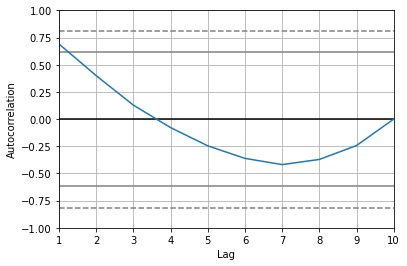

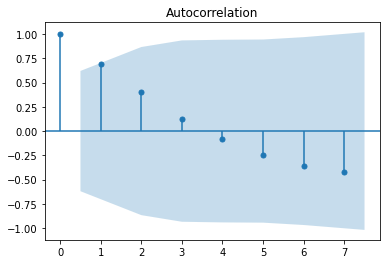

In [688]:
autocorrelation_plot(X_total_grouped['00 - 19'])
pyplot.show()

plot_acf(X_total_grouped['00 - 19'], lags=7)
pyplot.show()

From the ACF plots, the best lag variable is 1

## AUTOREGRESSION – "00 - 19"

### Persistence Model / "baseline" (using walk-forward validation)

Test MSE: 58016050.000
Test R2:  -1.3918596201911928


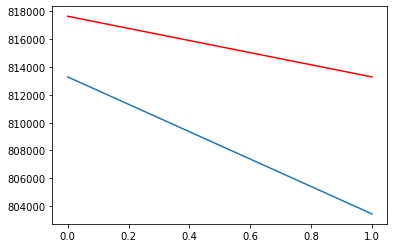

In [607]:
# Persistence Model

series = X_total_grouped["00 - 19"]

# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-2], X[len(X)-2:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
    return x
 
# walk-forward validation
predictions = []
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
test_r2 = r2_score(test_y, predictions)
print('Test R2: ', test_r2 )
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

### Static autoregressive model (on the original data)

We can use AR model to make a prediction by calling the predict() function for a number of observations in the future. This creates 1 2-year forecast, which is different from the persistence example above.

Coefficients: [5.75307396e+04 9.19776642e-01]
predicted=809586.110819, expected=813290.000000
predicted=802169.133908, expected=803440.000000
Test RMSE: 2768.925
Test R2:  0.6839105220356755


C:\.SOFTWARE\Anaconda\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


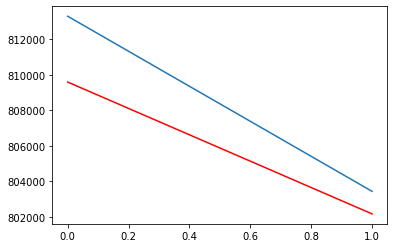

In [608]:
# Static autoregressive model

train = X_train_grouped["00 - 19"].values
test = X_test_grouped["00 - 19"].values

# train autoregression
model = AutoReg(train, lags=1) # lags set to 1, the parameter found to be the best just now
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
test_r2 = r2_score(test, predictions)
print('Test R2: ', test_r2 )
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

###### R2 for AR on "00 - 19": 0.6839

### Static autoregressive model (on the log transformed data)

Now we do the same thing but on our log transformed data to compare the R2

Coefficients: [1.42450463 0.89472231]
predicted=13.605424, expected=13.608843
predicted=13.597581, expected=13.596658
Test RMSE: 0.003
Test R2:  0.831050133529146


C:\.SOFTWARE\Anaconda\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


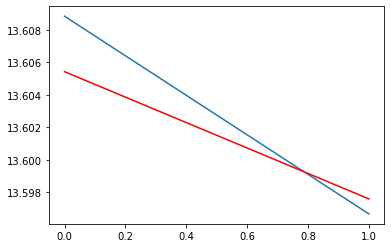

In [619]:
# Static autoregressive model
# We can use AR model to make a prediction by calling the predict() function for a number of observations in the future. 
# This creates 1 2-year forecast, which is different from the persistence example above.

train = data["00 - 19 - log"][1:-2].values
test = data["00 - 19 - log"][-2:].values

# train autoregression
model = AutoReg(train, lags=1) # lags set to 1, the parameter found to be the best just now
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
test_r2 = r2_score(test, predictions)
print('Test R2: ', test_r2 )
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

###### R2 for AR on "00 - 19": 0.83105. This is an improvement over the non-transformed data.

Hence, we can conclude that the visual test triumphs the statistical test, and that transformations should be applied regardless of the results of the ADF test for our dataset (given that it has very few data points)

### ARIMA

ARIMA, short for ‘Auto Regressive Integrated Moving Average’ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.

Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.

An ARIMA model is characterized by 3 terms: p, d, q

where,

p is the order of the AR term

q is the order of the MA term

d is the number of differencing required to make the time series stationary

For demonstration purposes, we take p,q,d to be 1,1,1

predicted=809495.304864, expected=813290.000000
predicted=806963.692194, expected=803440.000000
Test RMSE: 3661.702
Test R2:  0.4472185760446611


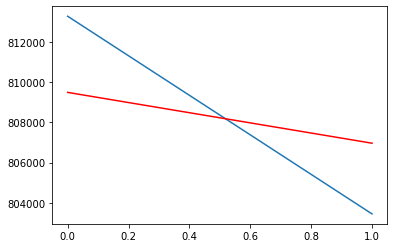

In [730]:
# evaluate an ARIMA model using a walk-forward validation

train = data["00 - 19"][:-2].values
test = data["00 - 19"][-2:].values

history = [x for x in train]
predictions = []

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
test_r2 = r2_score(test, predictions)
print('Test R2: ', test_r2 )
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Test R2: 0.44722. This low R2 either suggests that the hyperparameters (currently 1,1,1) need to be tuned, or that AR is better

### Hyperparameter tuning for ARIMA (grid search)

In [745]:
#refactor the ARIMA into a function

def evaluate_ARIMA(X, arima_order):
    
    train = X[:-2].values
    test = X[-2:].values

    history = [x for x in train]
    predictions = []

    # walk-forward validation
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    # evaluate forecasts
    rmse = sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % rmse)
    test_r2 = r2_score(test, predictions)
    print('Test R2: ', test_r2 )
    # plot forecasts against actual outcomes
    pyplot.plot(test)
    pyplot.plot(predictions, color='red')
    pyplot.show()
    return test_r2

predicted=809495.304864, expected=813290.000000
predicted=806963.692194, expected=803440.000000
Test RMSE: 3661.702
Test R2:  0.4472185760446611


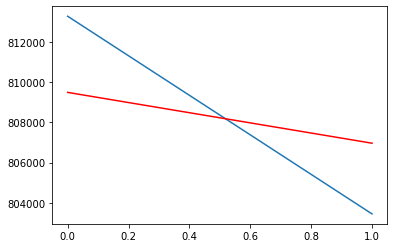

0.4472185760446611

In [746]:
#testing
evaluate_ARIMA(data["00 - 19"], (1,1,1))

In [749]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = 0, None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					test_r2 = evaluate_ARIMA(dataset, order)
					if test_r2 > best_score:
						best_score, best_cfg = test_r2, order
					print('ARIMA%s R2=%.3f' % (order,test_r2))
				except:
					continue
	print('Best ARIMA%s R2=%.3f' % (best_cfg, best_score))

predicted=854348.750000, expected=813290.000000
predicted=849788.471470, expected=803440.000000
Test RMSE: 43783.569
Test R2:  -78.03325346573946


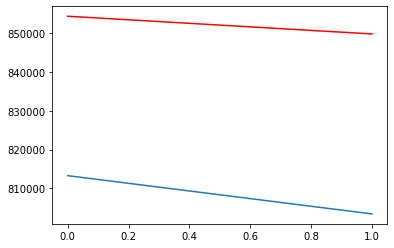

ARIMA(0, 0, 0) R2=-78.033
predicted=835432.579514, expected=813290.000000
predicted=834689.346610, expected=803440.000000
Test RMSE: 27081.502
Test R2:  -29.23660597340737


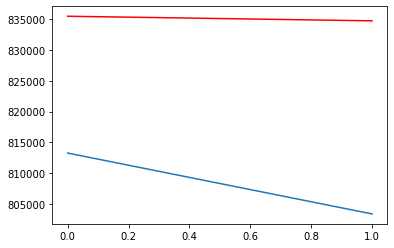

ARIMA(0, 0, 1) R2=-29.237
predicted=nan, expected=813290.000000
predicted=823422.818487, expected=803440.000000
predicted=817650.000000, expected=813290.000000
predicted=813290.000000, expected=803440.000000
Test RMSE: 7616.827
Test R2:  -1.3918597188017094


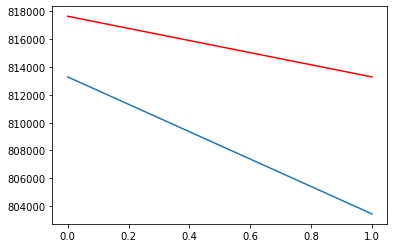

ARIMA(0, 1, 0) R2=-1.392
predicted=817783.688674, expected=813290.000000
predicted=813350.302995, expected=803440.000000
Test RMSE: 7694.392
Test R2:  -1.4408224532402247


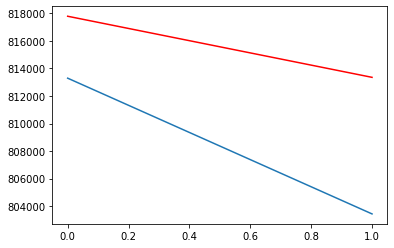

ARIMA(0, 1, 1) R2=-1.441
predicted=817983.404478, expected=813290.000000
predicted=nan, expected=803440.000000
predicted=807850.000000, expected=813290.000000
predicted=808930.000000, expected=803440.000000
Test RMSE: 5465.057
Test R2:  -0.2313371117560199


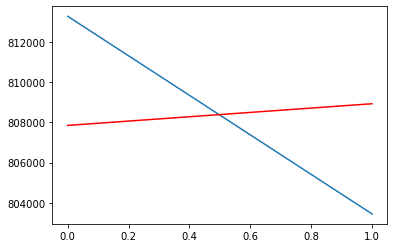

ARIMA(0, 2, 0) R2=-0.231
predicted=807845.256165, expected=813290.000000
predicted=808946.791101, expected=803440.000000
Test RMSE: 5475.855
Test R2:  -0.23620781026456883


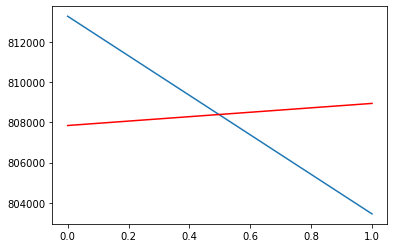

ARIMA(0, 2, 1) R2=-0.236
predicted=807845.027920, expected=813290.000000
predicted=808948.386976, expected=803440.000000
Test RMSE: 5476.771
Test R2:  -0.23662141245327706


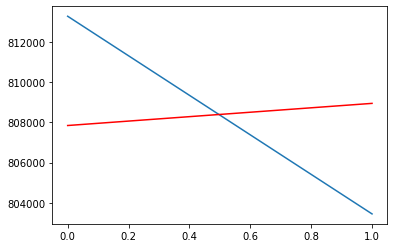

ARIMA(0, 2, 2) R2=-0.237
predicted=819354.814467, expected=813290.000000
predicted=814769.817660, expected=803440.000000
Test RMSE: 9086.989
Test R2:  -2.404297962501245


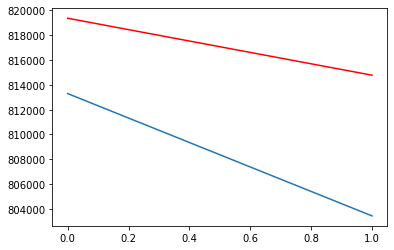

ARIMA(1, 0, 0) R2=-2.404
predicted=812128.270369, expected=813290.000000
predicted=816105.865281, expected=803440.000000
Test RMSE: 8993.713
Test R2:  -2.3347680323651563


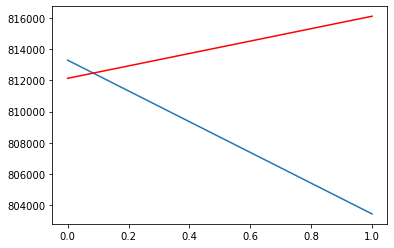

ARIMA(1, 0, 1) R2=-2.335
predicted=817777.140491, expected=813290.000000
predicted=813352.579710, expected=803440.000000
Test RMSE: 7693.948
Test R2:  -1.4405405175087718


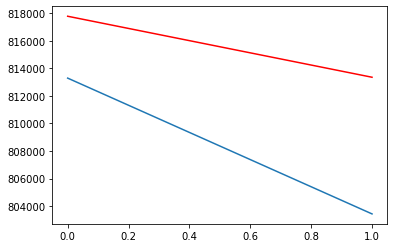

ARIMA(1, 1, 0) R2=-1.441
predicted=809495.304864, expected=813290.000000
predicted=806963.692194, expected=803440.000000
Test RMSE: 3661.702
Test R2:  0.44721855325483617


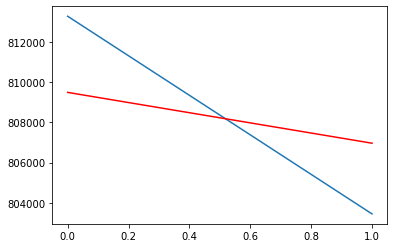

ARIMA(1, 1, 1) R2=0.447
predicted=810506.923851, expected=813290.000000
predicted=807845.440224, expected=813290.000000
predicted=808947.041260, expected=803440.000000
Test RMSE: 5475.890
Test R2:  -0.2362232898282306


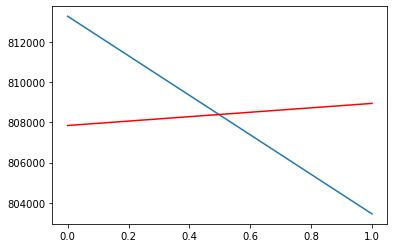

ARIMA(1, 2, 0) R2=-0.236
predicted=808578.510032, expected=813290.000000
predicted=807634.304691, expected=803440.000000
Test RMSE: 4460.400
Test R2:  0.17977105915103608


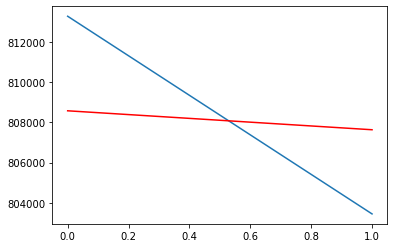

ARIMA(1, 2, 1) R2=0.180
predicted=807845.024926, expected=813290.000000
predicted=808948.328579, expected=803440.000000
Test RMSE: 5476.743
Test R2:  -0.23660882304290798


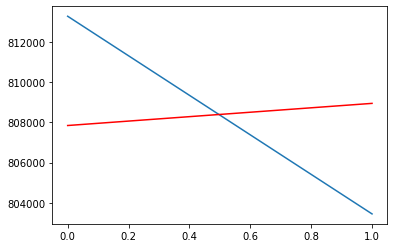

ARIMA(1, 2, 2) R2=-0.237
predicted=809560.669290, expected=813290.000000
predicted=811388.206514, expected=803440.000000
Test RMSE: 6208.136
Test R2:  -0.588948903753794


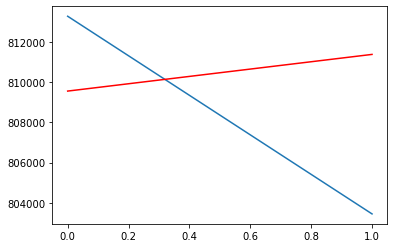

ARIMA(2, 0, 0) R2=-0.589
predicted=809351.474978, expected=813290.000000
predicted=811343.614714, expected=803440.000000
Test RMSE: 6244.161
Test R2:  -0.6074438012896031


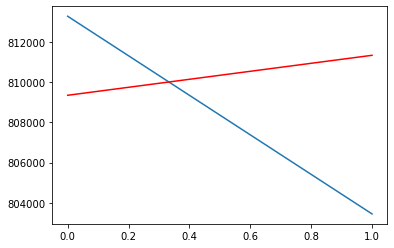

ARIMA(2, 0, 1) R2=-0.607
predicted=817977.419310, expected=813290.000000
predicted=813536.856062, expected=803440.000000
Test RMSE: 7871.417
Test R2:  -1.5544261845035483


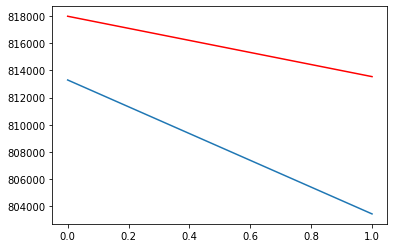

ARIMA(2, 1, 0) R2=-1.554
predicted=810510.967935, expected=813290.000000
predicted=807839.014158, expected=803440.000000
Test RMSE: 3679.290
Test R2:  0.44189552116769537


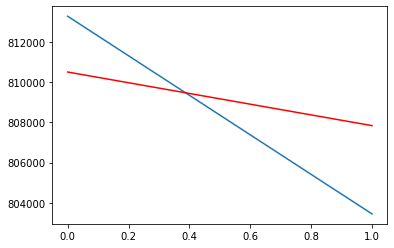

ARIMA(2, 1, 1) R2=0.442
predicted=809521.643507, expected=813290.000000
predicted=807845.533355, expected=813290.000000
predicted=808947.261833, expected=803440.000000
Test RMSE: 5475.954
Test R2:  -0.2362524656963514


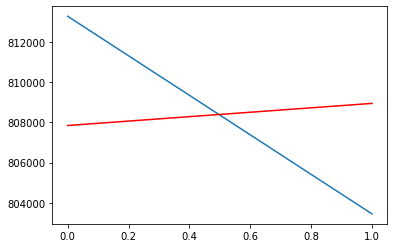

ARIMA(2, 2, 0) R2=-0.236
predicted=807849.999961, expected=813290.000000
predicted=808948.087902, expected=803440.000000
Test RMSE: 5474.150
Test R2:  -0.2354378671962578


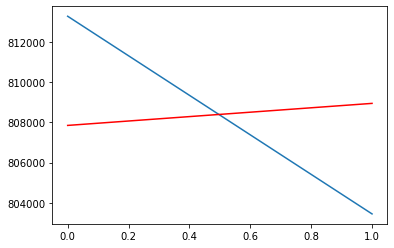

ARIMA(2, 2, 1) R2=-0.235
predicted=806000.972874, expected=813290.000000
predicted=809435.882041, expected=803440.000000
Test RMSE: 6673.849
Test R2:  -0.8362858422425177


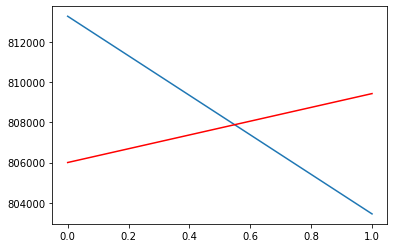

ARIMA(2, 2, 2) R2=-0.836
predicted=809407.226593, expected=813290.000000
predicted=811346.424063, expected=803440.000000
Test RMSE: 6228.462
Test R2:  -0.5993707437623028


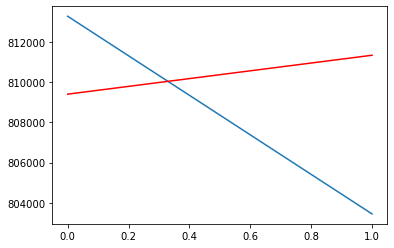

ARIMA(3, 0, 0) R2=-0.599
predicted=809346.337867, expected=813290.000000
predicted=810488.067606, expected=803440.000000
Test RMSE: 5710.855
Test R2:  -0.34458977426884685


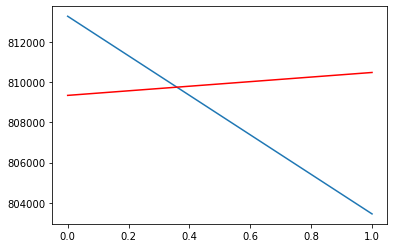

ARIMA(3, 0, 1) R2=-0.345
predicted=818278.925121, expected=813290.000000
predicted=813655.550912, expected=803440.000000
Test RMSE: 8038.870
Test R2:  -1.6642657039246243


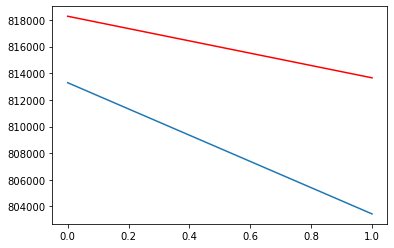

ARIMA(3, 1, 0) R2=-1.664
predicted=810562.221745, expected=813290.000000
predicted=808224.592655, expected=803440.000000
Test RMSE: 3894.426
Test R2:  0.37472024864435594


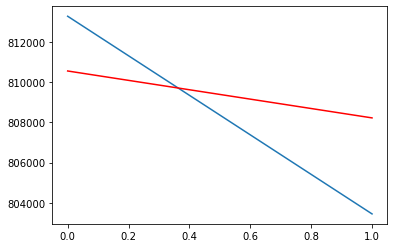

ARIMA(3, 1, 1) R2=0.375
predicted=811079.785747, expected=813290.000000
predicted=807124.809060, expected=813290.000000
predicted=808922.339979, expected=803440.000000
Test RMSE: 5833.765
Test R2:  -0.40308967042011323


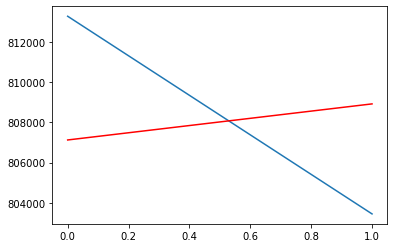

ARIMA(3, 2, 0) R2=-0.403
predicted=809139.373534, expected=813290.000000
predicted=808917.773408, expected=803440.000000
Test RMSE: 4859.717
Test R2:  0.02633505599422059


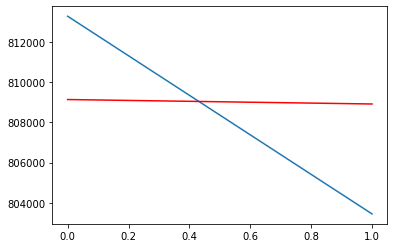

ARIMA(3, 2, 1) R2=0.026
predicted=808020.237860, expected=813290.000000
predicted=809484.198196, expected=803440.000000
Test RMSE: 5670.217
Test R2:  -0.325521966482226


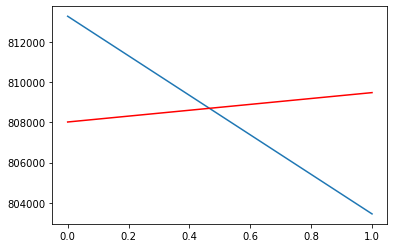

ARIMA(3, 2, 2) R2=-0.326
predicted=810360.638770, expected=813290.000000
predicted=810702.714027, expected=803440.000000
Test RMSE: 5537.516
Test R2:  -0.2642052055914208


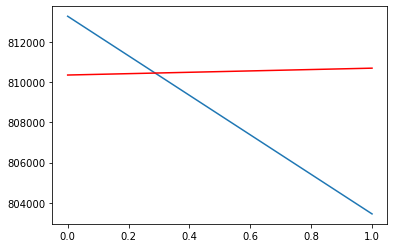

ARIMA(4, 0, 0) R2=-0.264
predicted=809395.826469, expected=813290.000000
predicted=967226.010563, expected=803440.000000
Test RMSE: 115846.929
Test R2:  -552.2948120312078


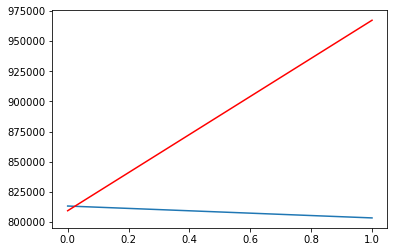

ARIMA(4, 0, 1) R2=-552.295
predicted=807343.102109, expected=813290.000000
predicted=807198.086044, expected=803440.000000
Test RMSE: 4974.375
Test R2:  -0.020151145942989945


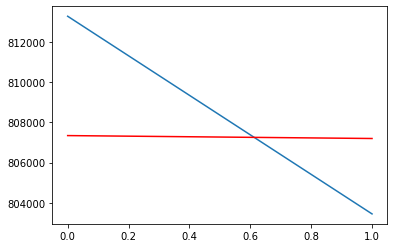

ARIMA(4, 1, 0) R2=-0.020
predicted=810123.466876, expected=813290.000000
predicted=810832.348756, expected=803440.000000
Test RMSE: 5686.552
Test R2:  -0.33317024052102595


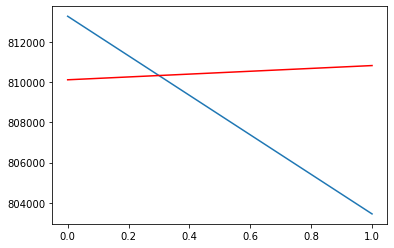

ARIMA(4, 1, 1) R2=-0.333
predicted=810534.644728, expected=813290.000000
predicted=807479.980958, expected=813290.000000
predicted=807519.121730, expected=813290.000000
predicted=808998.723084, expected=803440.000000
Test RMSE: 5665.794
Test R2:  -0.32345468284611645


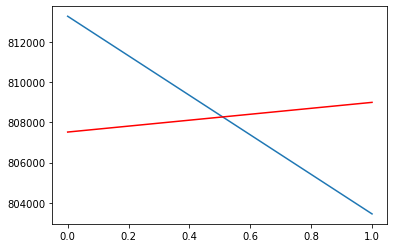

ARIMA(4, 2, 1) R2=-0.323
predicted=807836.219348, expected=813290.000000
predicted=809260.668590, expected=803440.000000
Test RMSE: 5640.209
Test R2:  -0.3115289518165423


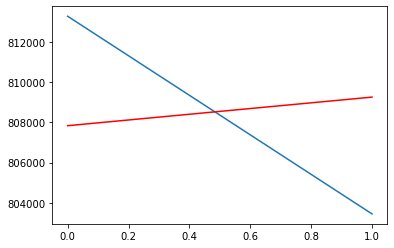

ARIMA(4, 2, 2) R2=-0.312
predicted=812882.493285, expected=813290.000000
predicted=816148.220367, expected=803440.000000
Test RMSE: 8990.688
Test R2:  -2.332524584967919


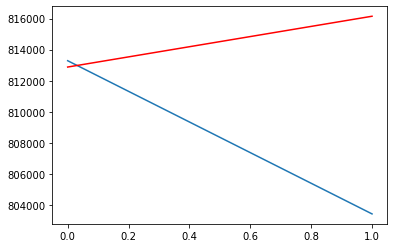

ARIMA(5, 0, 1) R2=-2.333
predicted=802880.784004, expected=813290.000000
predicted=814874.918242, expected=803440.000000
Test RMSE: 10934.101
Test R2:  -3.928942105392559


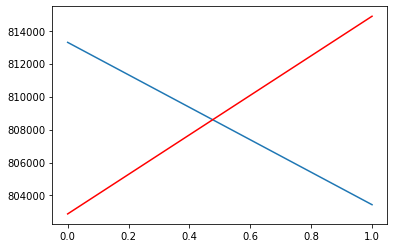

ARIMA(5, 1, 0) R2=-3.929
predicted=803010.923448, expected=813290.000000
predicted=815069.642008, expected=803440.000000
Test RMSE: 10975.153
Test R2:  -3.96602330271069


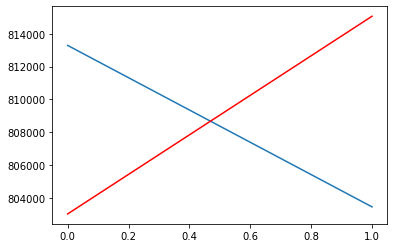

ARIMA(5, 1, 1) R2=-3.966
predicted=809254.220512, expected=813290.000000
predicted=807831.845023, expected=813290.000000
predicted=808930.000179, expected=803440.000000
Test RMSE: 5474.101
Test R2:  -0.23541570653104515


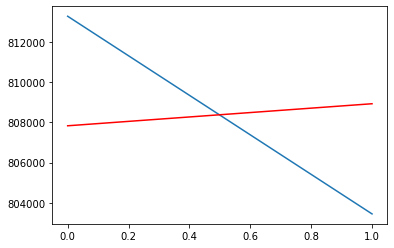

ARIMA(5, 2, 0) R2=-0.235
predicted=807832.808062, expected=813290.000000
predicted=810559.752682, expected=803440.000000
Test RMSE: 6343.178
Test R2:  -0.6588281156430926


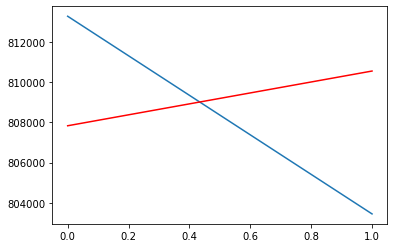

ARIMA(5, 2, 1) R2=-0.659
predicted=807833.733283, expected=813290.000000
predicted=808908.146383, expected=803440.000000
Test RMSE: 5462.210
Test R2:  -0.23005434438586048


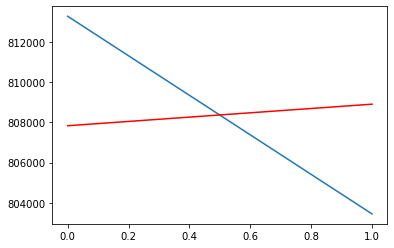

ARIMA(5, 2, 2) R2=-0.230
predicted=812633.838765, expected=813290.000000
predicted=816912.447853, expected=803440.000000
Test RMSE: 9537.751
Test R2:  -2.750416783984127


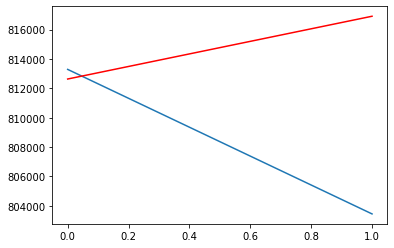

ARIMA(6, 0, 0) R2=-2.750
predicted=812564.756410, expected=813290.000000
predicted=817596.542391, expected=803440.000000
Test RMSE: 10023.315
Test R2:  -3.142001680644163


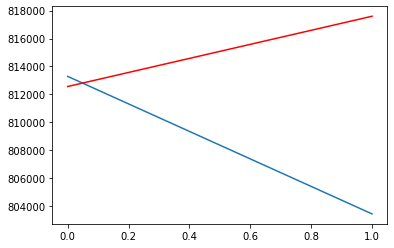

ARIMA(6, 0, 1) R2=-3.142
predicted=818704.002266, expected=813290.000000
predicted=814748.074058, expected=803440.000000
Test RMSE: 8865.212
Test R2:  -2.2401549311448727


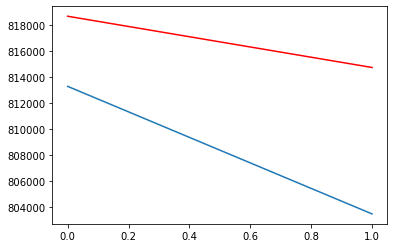

ARIMA(6, 1, 0) R2=-2.240
predicted=809330.422347, expected=813290.000000
predicted=815197.183537, expected=803440.000000
Test RMSE: 8772.389
Test R2:  -2.1726584301649106


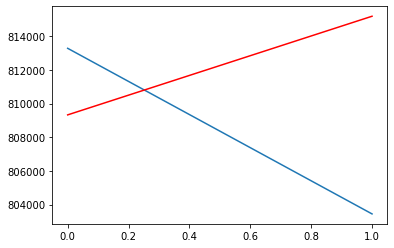

ARIMA(6, 1, 1) R2=-2.173
predicted=809600.666959, expected=813290.000000
predicted=807834.318635, expected=813290.000000
predicted=808921.817703, expected=803440.000000
Test RMSE: 5468.765
Test R2:  -0.23300856920646562


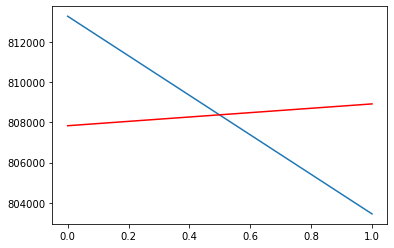

ARIMA(6, 2, 0) R2=-0.233
predicted=807832.177166, expected=813290.000000
predicted=807834.283752, expected=813290.000000
predicted=806513.156288, expected=803440.000000
Test RMSE: 4427.704
Test R2:  0.19175179016753752


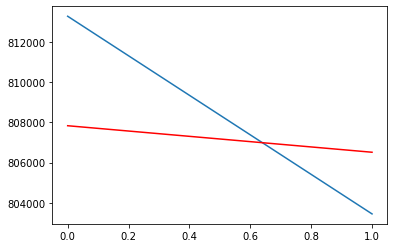

ARIMA(6, 2, 2) R2=0.192
predicted=823411.790856, expected=813290.000000
predicted=815892.759447, expected=803440.000000
Test RMSE: 11347.288
Test R2:  -4.308498103014465


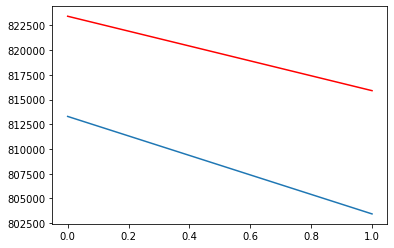

ARIMA(7, 0, 0) R2=-4.308
predicted=823408.488128, expected=813290.000000
predicted=823430.455229, expected=813290.000000
predicted=818915.361390, expected=813290.000000
predicted=814340.495685, expected=803440.000000
Test RMSE: 8673.681
Test R2:  -2.1016620503700825


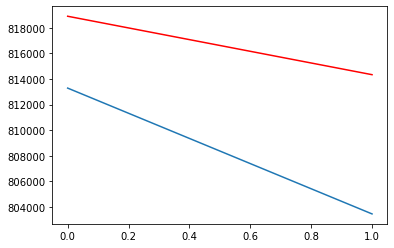

ARIMA(7, 1, 0) R2=-2.102
predicted=818851.065929, expected=813290.000000
predicted=811311.269199, expected=803440.000000
Test RMSE: 6814.776
Test R2:  -0.9146556088641671


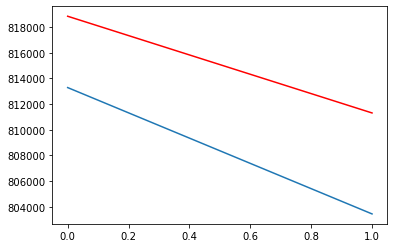

ARIMA(7, 1, 1) R2=-0.915
predicted=818775.627201, expected=813290.000000
predicted=809493.069710, expected=803440.000000
Test RMSE: 5776.321
Test R2:  -0.37559352621239017


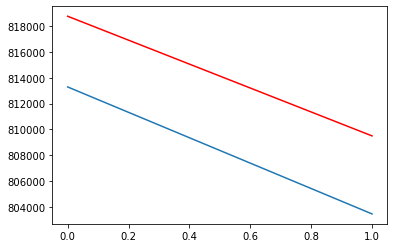

ARIMA(7, 1, 2) R2=-0.376
predicted=806496.927753, expected=813290.000000
predicted=808891.084074, expected=803440.000000
Test RMSE: 6158.740
Test R2:  -0.5637641014877552


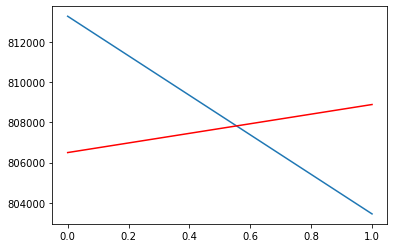

ARIMA(7, 2, 0) R2=-0.564
predicted=806623.660208, expected=813290.000000
predicted=808906.368292, expected=803440.000000
Test RMSE: 6095.952
Test R2:  -0.5320419817813513


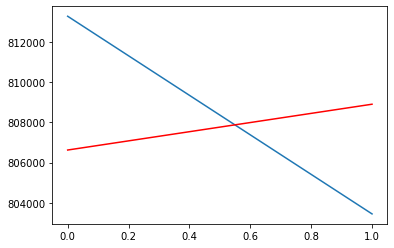

ARIMA(7, 2, 1) R2=-0.532
predicted=806964.723104, expected=813290.000000
predicted=808901.456438, expected=803440.000000
Test RMSE: 5909.172
Test R2:  -0.43959673517633324


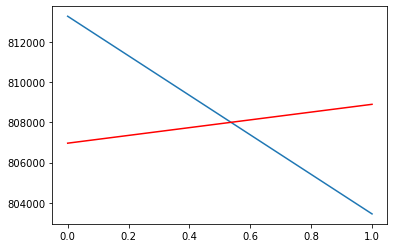

ARIMA(7, 2, 2) R2=-0.440
predicted=823411.850141, expected=813290.000000
predicted=819582.395830, expected=803440.000000
Test RMSE: 13472.728
Test R2:  -6.483394230834554


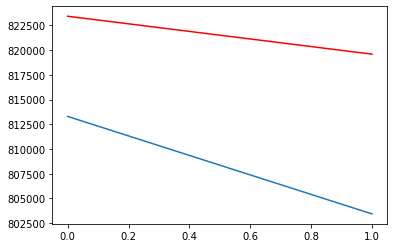

ARIMA(8, 0, 0) R2=-6.483
predicted=822634.003995, expected=813290.000000
predicted=819672.167244, expected=803440.000000
Test RMSE: 13243.747
Test R2:  -6.231182015763185


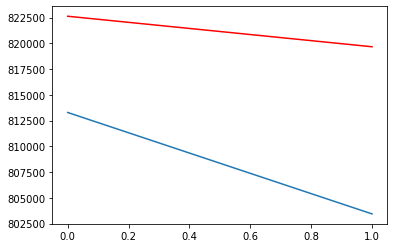

ARIMA(8, 0, 1) R2=-6.231
predicted=821961.319750, expected=813290.000000
predicted=819582.248880, expected=803440.000000
Test RMSE: 12956.928
Test R2:  -5.92136357998319


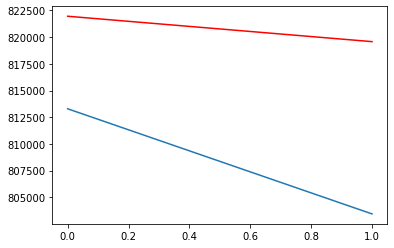

ARIMA(8, 0, 2) R2=-5.921
predicted=818915.362070, expected=813290.000000
predicted=814441.311075, expected=803440.000000
Test RMSE: 8737.092
Test R2:  -2.1471782334447265


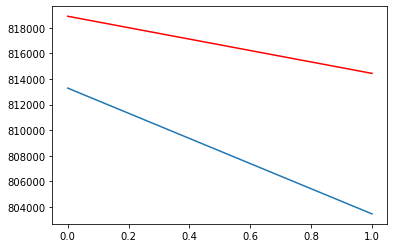

ARIMA(8, 1, 0) R2=-2.147
predicted=818878.825372, expected=813290.000000
predicted=814411.286278, expected=803440.000000
Test RMSE: 8706.437
Test R2:  -2.1251327866045706


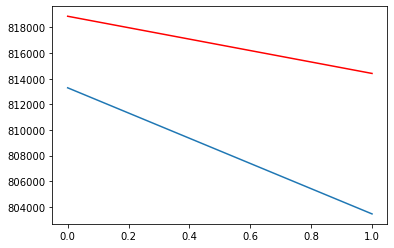

ARIMA(8, 1, 1) R2=-2.125
predicted=818831.393905, expected=813290.000000
predicted=814319.072356, expected=803440.000000
Test RMSE: 8633.112
Test R2:  -2.0727154606128027


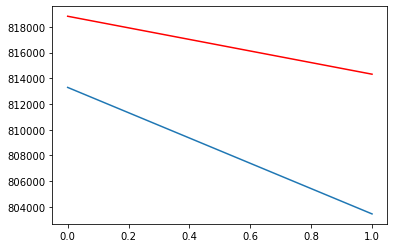

ARIMA(8, 1, 2) R2=-2.073
predicted=806496.929529, expected=813290.000000
predicted=803033.029161, expected=803440.000000
Test RMSE: 4812.039
Test R2:  0.04534652067393452


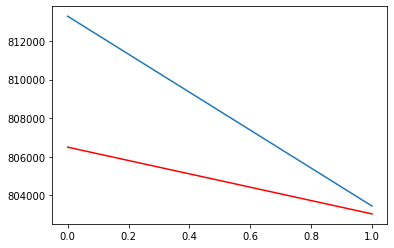

ARIMA(8, 2, 0) R2=0.045
predicted=806624.562647, expected=813290.000000
predicted=803239.837809, expected=803440.000000
Test RMSE: 4715.301
Test R2:  0.0833441348801226


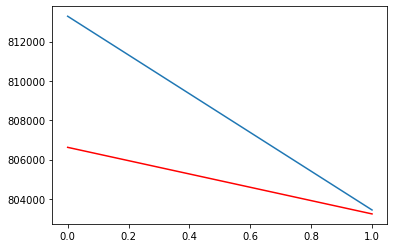

ARIMA(8, 2, 1) R2=0.083
predicted=806964.069231, expected=813290.000000
predicted=803650.647925, expected=803440.000000
Test RMSE: 4475.588
Test R2:  0.17417559247267156


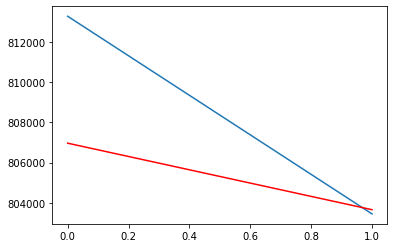

ARIMA(8, 2, 2) R2=0.174
Best ARIMA(1, 1, 1) R2=0.447


In [750]:
p_values = [0, 1, 2, 3, 4, 5, 6, 7, 8]
d_values = range(0, 3)
q_values = range(0, 3)
import warnings
warnings.filterwarnings("ignore")
evaluate_models(data["00 - 19"], p_values, d_values, q_values)

After the grid search, the best hyperparameters turn out to be (1,1,1). Our previous 0.447 R2 was already the best performance we could attain and no further tuning was required.
Given that autoregression performed better with or without applying differencing, we will go with AR as the model we will use for this time series forecasting.

## EXPLORING THE DATA – others

Male Percentage


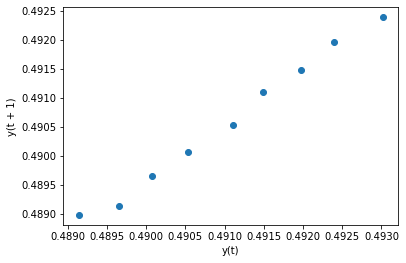

          t-1       t+1
t-1  1.000000  0.995922
t+1  0.995922  1.000000


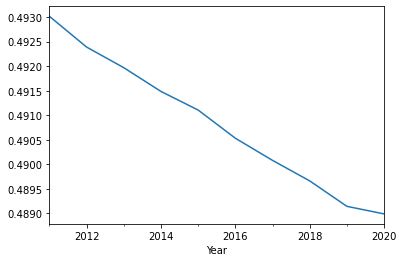

ADF Statistic: -1.572161
p-value: 0.497561
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803

 testing log transform...
ADF Statistic: -1.532550
p-value: 0.517352
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803

 testing log transform+differencing...
ADF Statistic: -3.076955
p-value: 0.028306
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803


C:\.SOFTWARE\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\misc.py:411: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


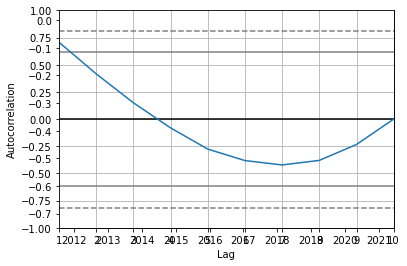

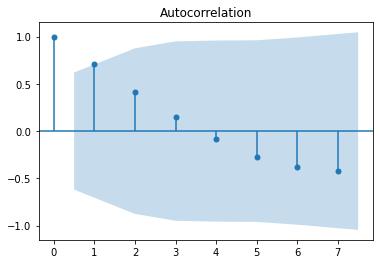

20 - 39


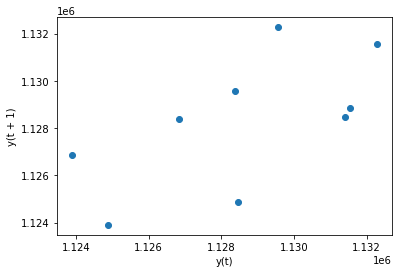

          t-1       t+1
t-1  1.000000  0.626937
t+1  0.626937  1.000000


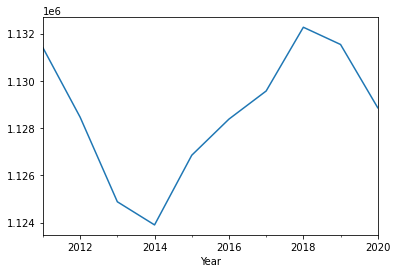

ADF Statistic: -23.112287
p-value: 0.000000
Critical Values:
	1%: -5.354
	5%: -3.646
	10%: -2.901

 testing log transform...
ADF Statistic: -22.559468
p-value: 0.000000
Critical Values:
	1%: -5.354
	5%: -3.646
	10%: -2.901

 testing log transform+differencing...
ADF Statistic: -2.401757
p-value: 0.141241
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844


C:\.SOFTWARE\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\misc.py:411: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


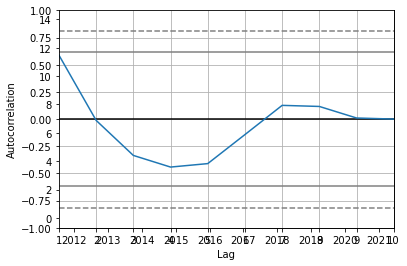

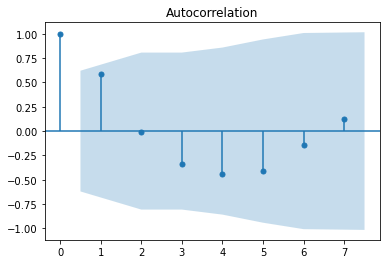

40 - 59


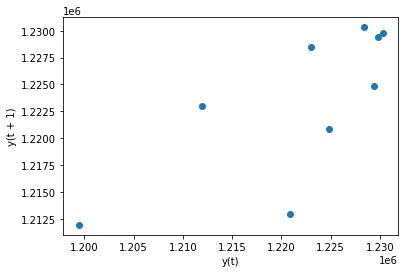

          t-1       t+1
t-1  1.000000  0.734888
t+1  0.734888  1.000000


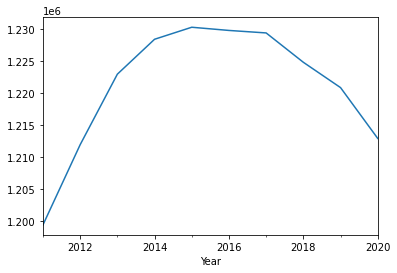

ADF Statistic: 0.379767
p-value: 0.980722
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844

 testing log transform...
ADF Statistic: 0.428534
p-value: 0.982531
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844

 testing log transform+differencing...
ADF Statistic: -2.658660
p-value: 0.081469
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844


C:\.SOFTWARE\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\misc.py:411: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


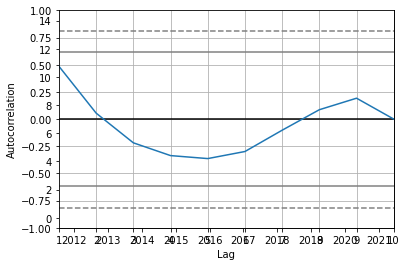

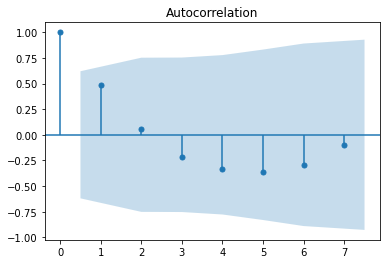

60 & Over


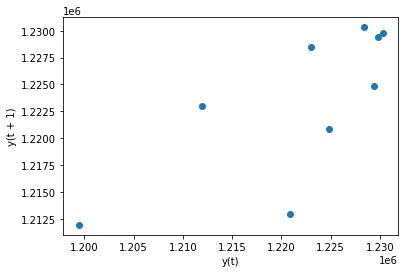

          t-1       t+1
t-1  1.000000  0.734888
t+1  0.734888  1.000000


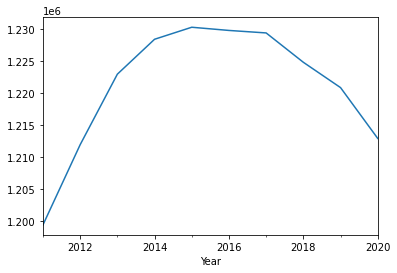

ADF Statistic: 0.379767
p-value: 0.980722
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844

 testing log transform...
ADF Statistic: 0.428534
p-value: 0.982531
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844

 testing log transform+differencing...
ADF Statistic: -2.658660
p-value: 0.081469
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844


C:\.SOFTWARE\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\misc.py:411: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


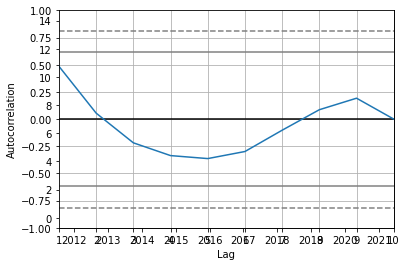

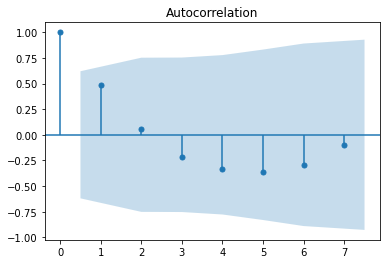

Average Income


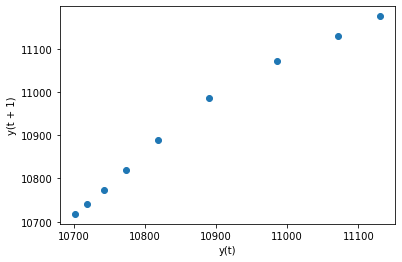

         t-1      t+1
t-1  1.00000  0.99048
t+1  0.99048  1.00000


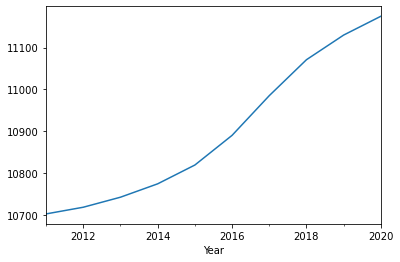

ADF Statistic: -15.812494
p-value: 0.000000
Critical Values:
	1%: -5.354
	5%: -3.646
	10%: -2.901

 testing log transform...
ADF Statistic: -14.237074
p-value: 0.000000
Critical Values:
	1%: -5.354
	5%: -3.646
	10%: -2.901

 testing log transform+differencing...
ADF Statistic: -1.507787
p-value: 0.529656
Critical Values:
	1%: -5.354
	5%: -3.646
	10%: -2.901


C:\.SOFTWARE\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\misc.py:411: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


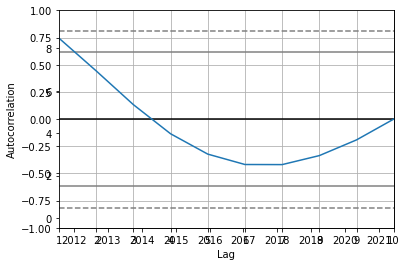

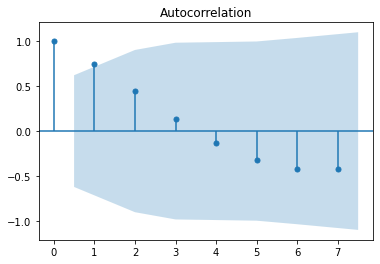

In [690]:
list = ['Male Percentage', '20 - 39', '40 - 59', '60 & Over', 'Average Income']
for i in list:
    print(i)
    
    lag_plot(X_total_grouped[i])
    pyplot.show()

    values = DataFrame(X_total_grouped[i].values)
    dataframe = concat([values.shift(1), values], axis=1)
    dataframe.columns = ['t-1', 't+1']
    result = dataframe.corr()
    print(result)
    
    X_total_grouped[i].plot()
    pyplot.show()
    
    series = X_total_grouped[i]
    X = series.values
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    
    print("\n testing log transform...")
    # log transform
    df_log = np.log(data[i])
    ADFtest(df_log)
    
    print("\n testing log transform+differencing...")
    # log transform and subtract the previous value when time shifting
    df_log_shift = df_log - df_log.shift()
    df_log_shift.dropna(inplace=True)
    ADFtest(df_log_shift)
    
    
    autocorrelation_plot(X_total_grouped[i])
    pyplot.show()

    plot_acf(X_total_grouped[i], lags=7)
    pyplot.show()


By doing the same analysis, we get that:


    Male Percentage = log transform+differencing

    20 - 39 = remain

    40 - 59 = log transform+differencing

    60 & Over = log transform+differencing

    Avg Income = remain

## Model fitting to forecast data

We would now like to fit models for each subzone to forecast its data in the future.

### Obtain list of subzones in final regression and filter data table down to those

In [767]:
BusMRTGeoData = pd.read_csv('BusMRTGeoData.csv')
BusMRTGeoData

,SUBZONE_N,AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK,AVG_TAP_IN_TAP_OUT_VOLUME_PEAK,AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY,AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY,PEAK_HOUR_PERCENTAGE,WEEKDAY_PERCENTAGE,"('2020', 'Male Percentage')","('2020', '00 - 19')","('2020', '20 - 39')","('2020', '40 - 59')","('2020', '60 & Over')","('2020', 'Average Income')"
0,ALJUNIED,477236.0,2649777.0,2670371.0,15454280.0,0.171459,0.863958,0.493623,6150,10720,12170,10940,11730.102220
1,ANAK BUKIT,147583.0,818550.0,849757.0,4909818.0,0.166717,0.865365,0.474166,4280,5660,6190,5750,19739.484317
2,ANCHORVALE,122622.0,674735.0,811713.0,4596871.0,0.146781,0.882897,0.492519,13550,14460,13710,6410,10559.805071
3,BEDOK NORTH,700065.0,3896305.0,4425740.0,25472206.0,0.152963,0.868739,0.485093,13230,20760,24610,23260,8815.353975
4,BEDOK RESERVOIR,155476.0,854617.0,878224.0,5012083.0,0.170511,0.876107,0.489988,5280,6820,7960,5420,12406.950807
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,WOODLANDS EAST,572727.0,3126930.0,3289376.0,18614145.0,0.167987,0.883569,0.499949,23130,30470,31480,13910,9709.300993
82,WOODLANDS WEST,254941.0,1409087.0,1579596.0,8975706.0,0.156989,0.879929,0.508994,6220,10300,9840,7560,7374.195426
83,YEW TEE,302951.0,1653555.0,1746928.0,9926964.0,0.166572,0.879890,0.497771,8460,11480,13730,6730,11017.340267
84,YIO CHU KANG,288341.0,1520813.0,1365389.0,7430472.0,0.204672,0.918777,NaN,0,0,0,0,NaN


In [769]:
listofSubzones = BusMRTGeoData["SUBZONE_N"]
listofSubzones

0            ALJUNIED
1          ANAK BUKIT
2          ANCHORVALE
3         BEDOK NORTH
4     BEDOK RESERVOIR
           ...       
81     WOODLANDS EAST
82     WOODLANDS WEST
83            YEW TEE
84       YIO CHU KANG
85        YISHUN WEST
Name: SUBZONE_N, Length: 86, dtype: object

In [848]:
dT_data1 = pd.read_csv('dT_data1.csv')
dT_data1_subzones = dT_data1.loc[dT_data1["SUBZONE_N"].isin(listofSubzones)]
dT_data1_subzones

,REGION_N,REGION_C,PLN_AREA_N,PLN_AREA_C,SUBZONE_N,2020,2020.1,2020.2,2020.3,2020.4,...,2012.2,2012.3,2012.4,2012.5,2011,2011.1,2011.2,2011.3,2011.4,2011.5
2,NORTH-EAST REGION,NER,ANG MO KIO,AM,CHENG SAN,0.48005698005698005,4300,7190,8440,8150,...,7190,8440,8150,6878.401296596435,0.4873921698739217,5530,7190,8440,8150,6732.12291249165
9,NORTH-EAST REGION,NER,ANG MO KIO,AM,YIO CHU KANG,NaN,0,0,0,0,...,0,0,0,NaN,NaN,0,0,0,0,NaN
14,EAST REGION,ER,BEDOK,BD,BEDOK NORTH,0.4850928641251222,13230,20760,24610,23260,...,20760,24610,23260,8462.147766707712,0.49256526049124355,19190,20760,24610,23260,8431.620421753607
15,EAST REGION,ER,BEDOK,BD,BEDOK RESERVOIR,0.48998822143698467,5280,6820,7960,5420,...,6820,7960,5420,10944.570578231293,0.49478260869565216,5440,6820,7960,5420,10625.189354275743
16,EAST REGION,ER,BEDOK,BD,BEDOK SOUTH,0.48265524625267664,7580,11490,13700,13930,...,11490,13700,13930,13045.02865818941,0.4892180761297581,11380,11490,13700,13930,13004.040499621498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,WEST REGION,WR,TUAS,TS,TUAS PROMENADE,NaN,0,0,0,0,...,2250,1820,1620,NaN,NaN,0,2250,1820,1620,NaN
308,NORTH REGION,NR,WOODLANDS,WD,WOODLANDS EAST,0.49994948984745935,23130,30470,31480,13910,...,0,0,0,10011.695546899673,0.503880033557047,28740,0,0,0,10014.060199265863
311,NORTH REGION,NR,WOODLANDS,WD,WOODLANDS WEST,0.5089943969330581,6220,10300,9840,7560,...,270,190,60,7602.80739116818,0.515625,7750,270,190,60,7620.616308470291
312,NORTH REGION,NR,YISHUN,YS,KHATIB,0.48585365853658535,1470,2970,2990,2830,...,0,0,0,8764.06113537118,0.4909248055315471,2500,0,0,0,8753.660311958405


In [849]:
dT_data1_subzones_alju = dT_data1_subzones[dT_data1_subzones["SUBZONE_N"] == "ALJUNIED"]
dT_data1_subzones_alju

,REGION_N,REGION_C,PLN_AREA_N,PLN_AREA_C,SUBZONE_N,2020,2020.1,2020.2,2020.3,2020.4,...,2012.2,2012.3,2012.4,2012.5,2011,2011.1,2011.2,2011.3,2011.4,2011.5
101,CENTRAL REGION,CR,GEYLANG,GL,ALJUNIED,0.49362340585146286,6150,10720,12170,10940,...,270,240,120,10494.256271519922,0.4975265017667845,8390,270,240,120,10493.36531007752


In [850]:
SubzonesData = dT_data1_hierarchical_pivoted.loc[dT_data1_hierarchical_pivoted["SUBZONE_N"].isin(listofSubzones)]
SubzonesData = SubzonesData[["SUBZONE_N", "Male Percentage", "00 - 19", "20 - 39", "40 - 59", "60 & Over", "Average Income", "Year"]]
SubzonesData = SubzonesData.sort_values(by=["SUBZONE_N", "Year"], ascending=True)
SubzonesData.head(40)

,SUBZONE_N,Male Percentage,00 - 19,20 - 39,40 - 59,60 & Over,Average Income,Year
1009,ALJUNIED,0.497527,8390,270,240,120,10493.365310,2011-12-31
1008,ALJUNIED,0.496174,8070,270,240,120,10494.256272,2012-12-31
1007,ALJUNIED,0.497406,8090,270,240,120,10432.653518,2013-12-31
1006,ALJUNIED,0.496120,8010,270,240,120,10588.383123,2014-12-31
1005,ALJUNIED,0.498202,7460,270,240,120,10767.615442,2015-12-31
1004,ALJUNIED,0.497686,7030,270,240,120,10874.354952,2016-12-31
1003,ALJUNIED,0.497000,6570,270,240,120,10984.718372,2017-12-31
1002,ALJUNIED,0.497874,6400,270,240,120,11291.631008,2018-12-31
1001,ALJUNIED,0.496014,6340,10750,12420,10650,11581.573779,2019-12-31
1000,ALJUNIED,0.493623,6150,10720,12170,10940,11730.102220,2020-12-31


### Creating prediction dataset for eventual export

In [820]:
predicted_subzone_data = pd.DataFrame( columns = ['Male Percentage', '00 - 19', '20 - 39', '40 - 59', '60 & Over', 'Average Income'])
predicted_subzone_data.insert(0, "SUBZONE_N", listofSubzones, True)
predicted_subzone_data

,SUBZONE_N,Male Percentage,00 - 19,20 - 39,40 - 59,60 & Over,Average Income
0,ALJUNIED,NaN,NaN,NaN,NaN,NaN,NaN
1,ANAK BUKIT,NaN,NaN,NaN,NaN,NaN,NaN
2,ANCHORVALE,NaN,NaN,NaN,NaN,NaN,NaN
3,BEDOK NORTH,NaN,NaN,NaN,NaN,NaN,NaN
4,BEDOK RESERVOIR,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
81,WOODLANDS EAST,NaN,NaN,NaN,NaN,NaN,NaN
82,WOODLANDS WEST,NaN,NaN,NaN,NaN,NaN,NaN
83,YEW TEE,NaN,NaN,NaN,NaN,NaN,NaN
84,YIO CHU KANG,NaN,NaN,NaN,NaN,NaN,NaN


In [842]:
data = SubzonesData[0:10]
data

#for i in range(len(listofSubzones)):
#    print(SubzonesData[10*i:10*i+10])

,SUBZONE_N,Male Percentage,00 - 19,20 - 39,40 - 59,60 & Over,Average Income,Year
1009,ALJUNIED,0.497527,8390,270,240,120,10493.365310,2011-12-31
1008,ALJUNIED,0.496174,8070,270,240,120,10494.256272,2012-12-31
1007,ALJUNIED,0.497406,8090,270,240,120,10432.653518,2013-12-31
1006,ALJUNIED,0.496120,8010,270,240,120,10588.383123,2014-12-31
1005,ALJUNIED,0.498202,7460,270,240,120,10767.615442,2015-12-31
1004,ALJUNIED,0.497686,7030,270,240,120,10874.354952,2016-12-31
1003,ALJUNIED,0.497000,6570,270,240,120,10984.718372,2017-12-31
1002,ALJUNIED,0.497874,6400,270,240,120,11291.631008,2018-12-31
1001,ALJUNIED,0.496014,6340,10750,12420,10650,11581.573779,2019-12-31
1000,ALJUNIED,0.493623,6150,10720,12170,10940,11730.102220,2020-12-31


In [843]:
data = SubzonesData[0:10]

# log transform
data["00 - 19"] = np.log(data["00 - 19"])

list = ['Male Percentage', '40 - 59', '60 & Over']
for i in list:
    # log transform
    df_log = np.log(data[i])
    # log transform and subtract the previous value when time shifting
    df_log_shift = df_log - df_log.shift()
    df_log_shift.dropna(inplace=True)
    data[str(i)] = df_log_shift
    #data = data.replace(np.nan,0)
data

,SUBZONE_N,Male Percentage,00 - 19,20 - 39,40 - 59,60 & Over,Average Income,Year
1009,ALJUNIED,NaN,9.034796,270,NaN,NaN,10493.365310,2011-12-31
1008,ALJUNIED,-0.002722,8.995909,270,0.000000,0.000000,10494.256272,2012-12-31
1007,ALJUNIED,0.002479,8.998384,270,0.000000,0.000000,10432.653518,2013-12-31
1006,ALJUNIED,-0.002587,8.988446,270,0.000000,0.000000,10588.383123,2014-12-31
1005,ALJUNIED,0.004187,8.917311,270,0.000000,0.000000,10767.615442,2015-12-31
1004,ALJUNIED,-0.001037,8.857942,270,0.000000,0.000000,10874.354952,2016-12-31
1003,ALJUNIED,-0.001379,8.790269,270,0.000000,0.000000,10984.718372,2017-12-31
1002,ALJUNIED,0.001758,8.764053,270,0.000000,0.000000,11291.631008,2018-12-31
1001,ALJUNIED,-0.003744,8.754634,10750,3.946424,4.485823,11581.573779,2019-12-31
1000,ALJUNIED,-0.004831,8.724207,10720,-0.020334,0.026866,11730.102220,2020-12-31


In [758]:
# train autoregression
model0019 = AutoReg(data["00 - 19 - log"], lags=1) # lags set to 1, the parameter found to be the best just now
model0019_fit = model0019.fit()


model2039 = AutoReg(data["20 - 39"], lags=1) # lags set to 1, the parameter found to be the best just now
model2039_fit = model2039.fit()


model4059 = AutoReg(data["40 - 59 - logdiff"], lags=1) # lags set to 1, the parameter found to be the best just now
model4059_fit = model4059.fit()


model60OV = AutoReg(data["60 & Over - logdiff"], lags=1) # lags set to 1, the parameter found to be the best just now
model60OV_fit = model60OV.fit()


modelAVIN = AutoReg(data["Average Income"], lags=1) # lags set to 1, the parameter found to be the best just now
modelAVIN_fit = modelAVIN.fit()


modelMALE = AutoReg(data["Male Percentage - logdiff"], lags=1) # lags set to 1, the parameter found to be the best just now
modelMALE_fit = modelMALE.fit()

In [759]:
predictions0019 = model0019_fit.predict(start=14, end=14, dynamic=False)
predictions0019

2025-12-31    13.561457
Freq: A-DEC, dtype: float64